# Plotting all

[      0     100     200 ... 2999700 2999800 2999900]
[2000.  2001.  2000.5 ... 2034.5 2033.  2033.5]


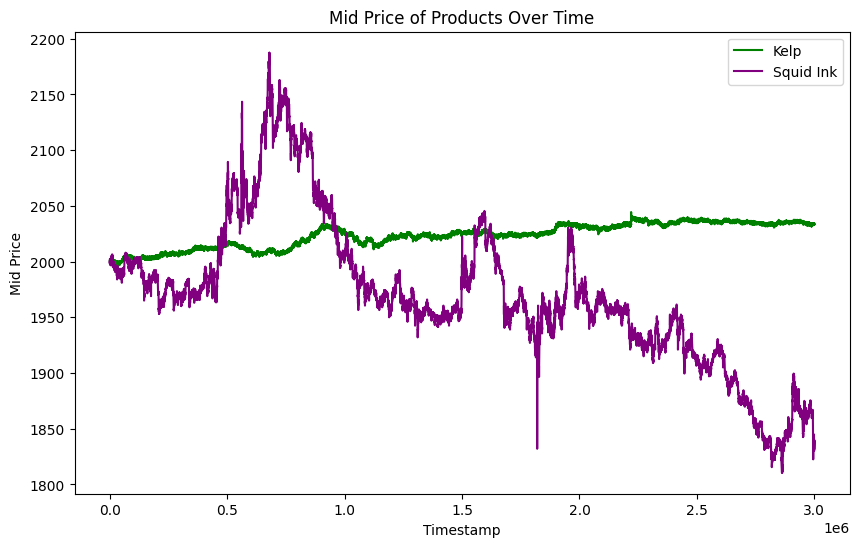

In [1]:
import pandas as pd
import numpy as np

prices1 = pd.read_csv(r'./round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_-2.csv',sep=';')
prices2 = pd.read_csv(r'./round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_-1.csv',sep=';')
prices3 = pd.read_csv(r'./round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_0.csv',sep=';')

import matplotlib.pyplot as plt
# Concatenate all dataframes
all_prices = pd.concat([prices1, prices2, prices3])
all_prices['timestamp'] = all_prices['timestamp']+(1000000*(all_prices['day']+2))

kelp_data = all_prices[all_prices['product'] == 'KELP']
kelp_x = kelp_data['timestamp'].to_numpy()
kelp_y = kelp_data['mid_price'].to_numpy()
kelp_z1 = kelp_data['bid_price_1'].to_numpy()
kelp_z2 = kelp_data['bid_price_2'].to_numpy()
kelp_z3 = kelp_data['bid_price_3'].to_numpy()
kelp_w1 = kelp_data['ask_price_1'].to_numpy()
kelp_w2 = kelp_data['ask_price_2'].to_numpy()
kelp_w3 = kelp_data['ask_price_3'].to_numpy()
print(kelp_x)
print(kelp_y)

resin_data = all_prices[all_prices['product'] == 'RAINFOREST_RESIN']
resin_x = resin_data['timestamp'].to_numpy()
resin_y = resin_data['mid_price'].to_numpy()
resin_z1 = resin_data['bid_price_1'].to_numpy()
resin_z2 = resin_data['bid_price_2'].to_numpy()
resin_z3 = resin_data['bid_price_3'].to_numpy()
resin_w1 = resin_data['ask_price_1'].to_numpy()
resin_w2 = resin_data['ask_price_2'].to_numpy()
resin_w3 = resin_data['ask_price_3'].to_numpy()

squid_ink_data = all_prices[all_prices['product'] == 'SQUID_INK']
squid_ink_x = squid_ink_data['timestamp'].to_numpy()
squid_ink_y = squid_ink_data['mid_price'].to_numpy()
squid_ink_z1 = squid_ink_data['bid_price_1'].to_numpy()
squid_ink_z2 = squid_ink_data['bid_price_2'].to_numpy()
squid_ink_z3 = squid_ink_data['bid_price_3'].to_numpy()
squid_ink_w1 = squid_ink_data['ask_price_1'].to_numpy()
squid_ink_w2 = squid_ink_data['ask_price_2'].to_numpy()
squid_ink_w3 = squid_ink_data['ask_price_3'].to_numpy()



plt.figure(figsize=(10, 6))
plt.plot(kelp_x, kelp_y, label='Kelp', color='green')
# plt.plot(resin_x, resin_y, label='Rainforest Resin', color='blue')
plt.plot(squid_ink_x, squid_ink_y, label='Squid Ink', color='purple')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('Mid Price of Products Over Time')
plt.legend()
plt.show()

# print(all_prices.head(6))


# Fourier transform

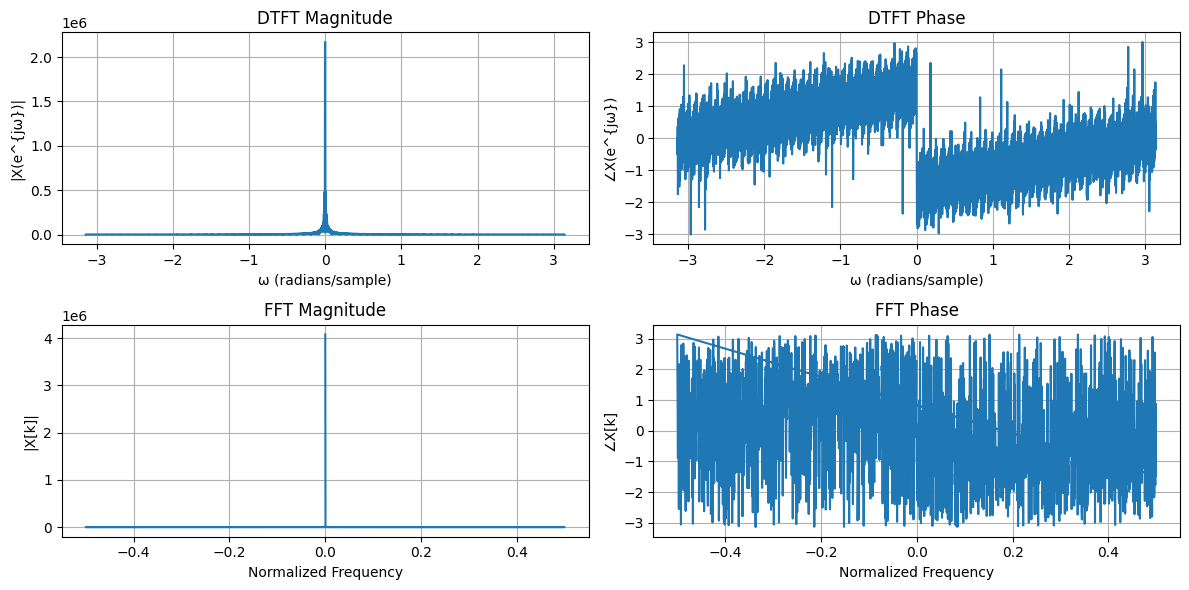

In [2]:
N_fft = 2048
x = squid_ink_y

X_fft = np.fft.fft(x, N_fft)
freq_fft = np.fft.fftfreq(N_fft, d=1)


omega = np.linspace(-np.pi, np.pi, N_fft)
X_dtft = np.array([sum(x[n] * np.exp(-1j * w * n) for n in range(len(x))) for w in omega])


plt.figure(figsize=(12, 6))


plt.subplot(2, 2, 1)
plt.plot(omega, np.abs(X_dtft))
plt.title("DTFT Magnitude")
plt.xlabel("ω (radians/sample)")
plt.ylabel("|X(e^{jω})|")
plt.grid()


plt.subplot(2, 2, 2)
plt.plot(omega, np.angle(X_dtft))
plt.title("DTFT Phase")
plt.xlabel("ω (radians/sample)")
plt.ylabel("∠X(e^{jω})")
plt.grid()


plt.subplot(2, 2, 3)
plt.plot(freq_fft, np.abs(X_fft))
plt.title("FFT Magnitude")
plt.xlabel("Normalized Frequency")
plt.ylabel("|X[k]|")
plt.grid()


plt.subplot(2, 2, 4)
plt.plot(freq_fft, np.angle(X_fft))
plt.title("FFT Phase")
plt.xlabel("Normalized Frequency")
plt.ylabel("∠X[k]")
plt.grid()

plt.tight_layout()
plt.show()


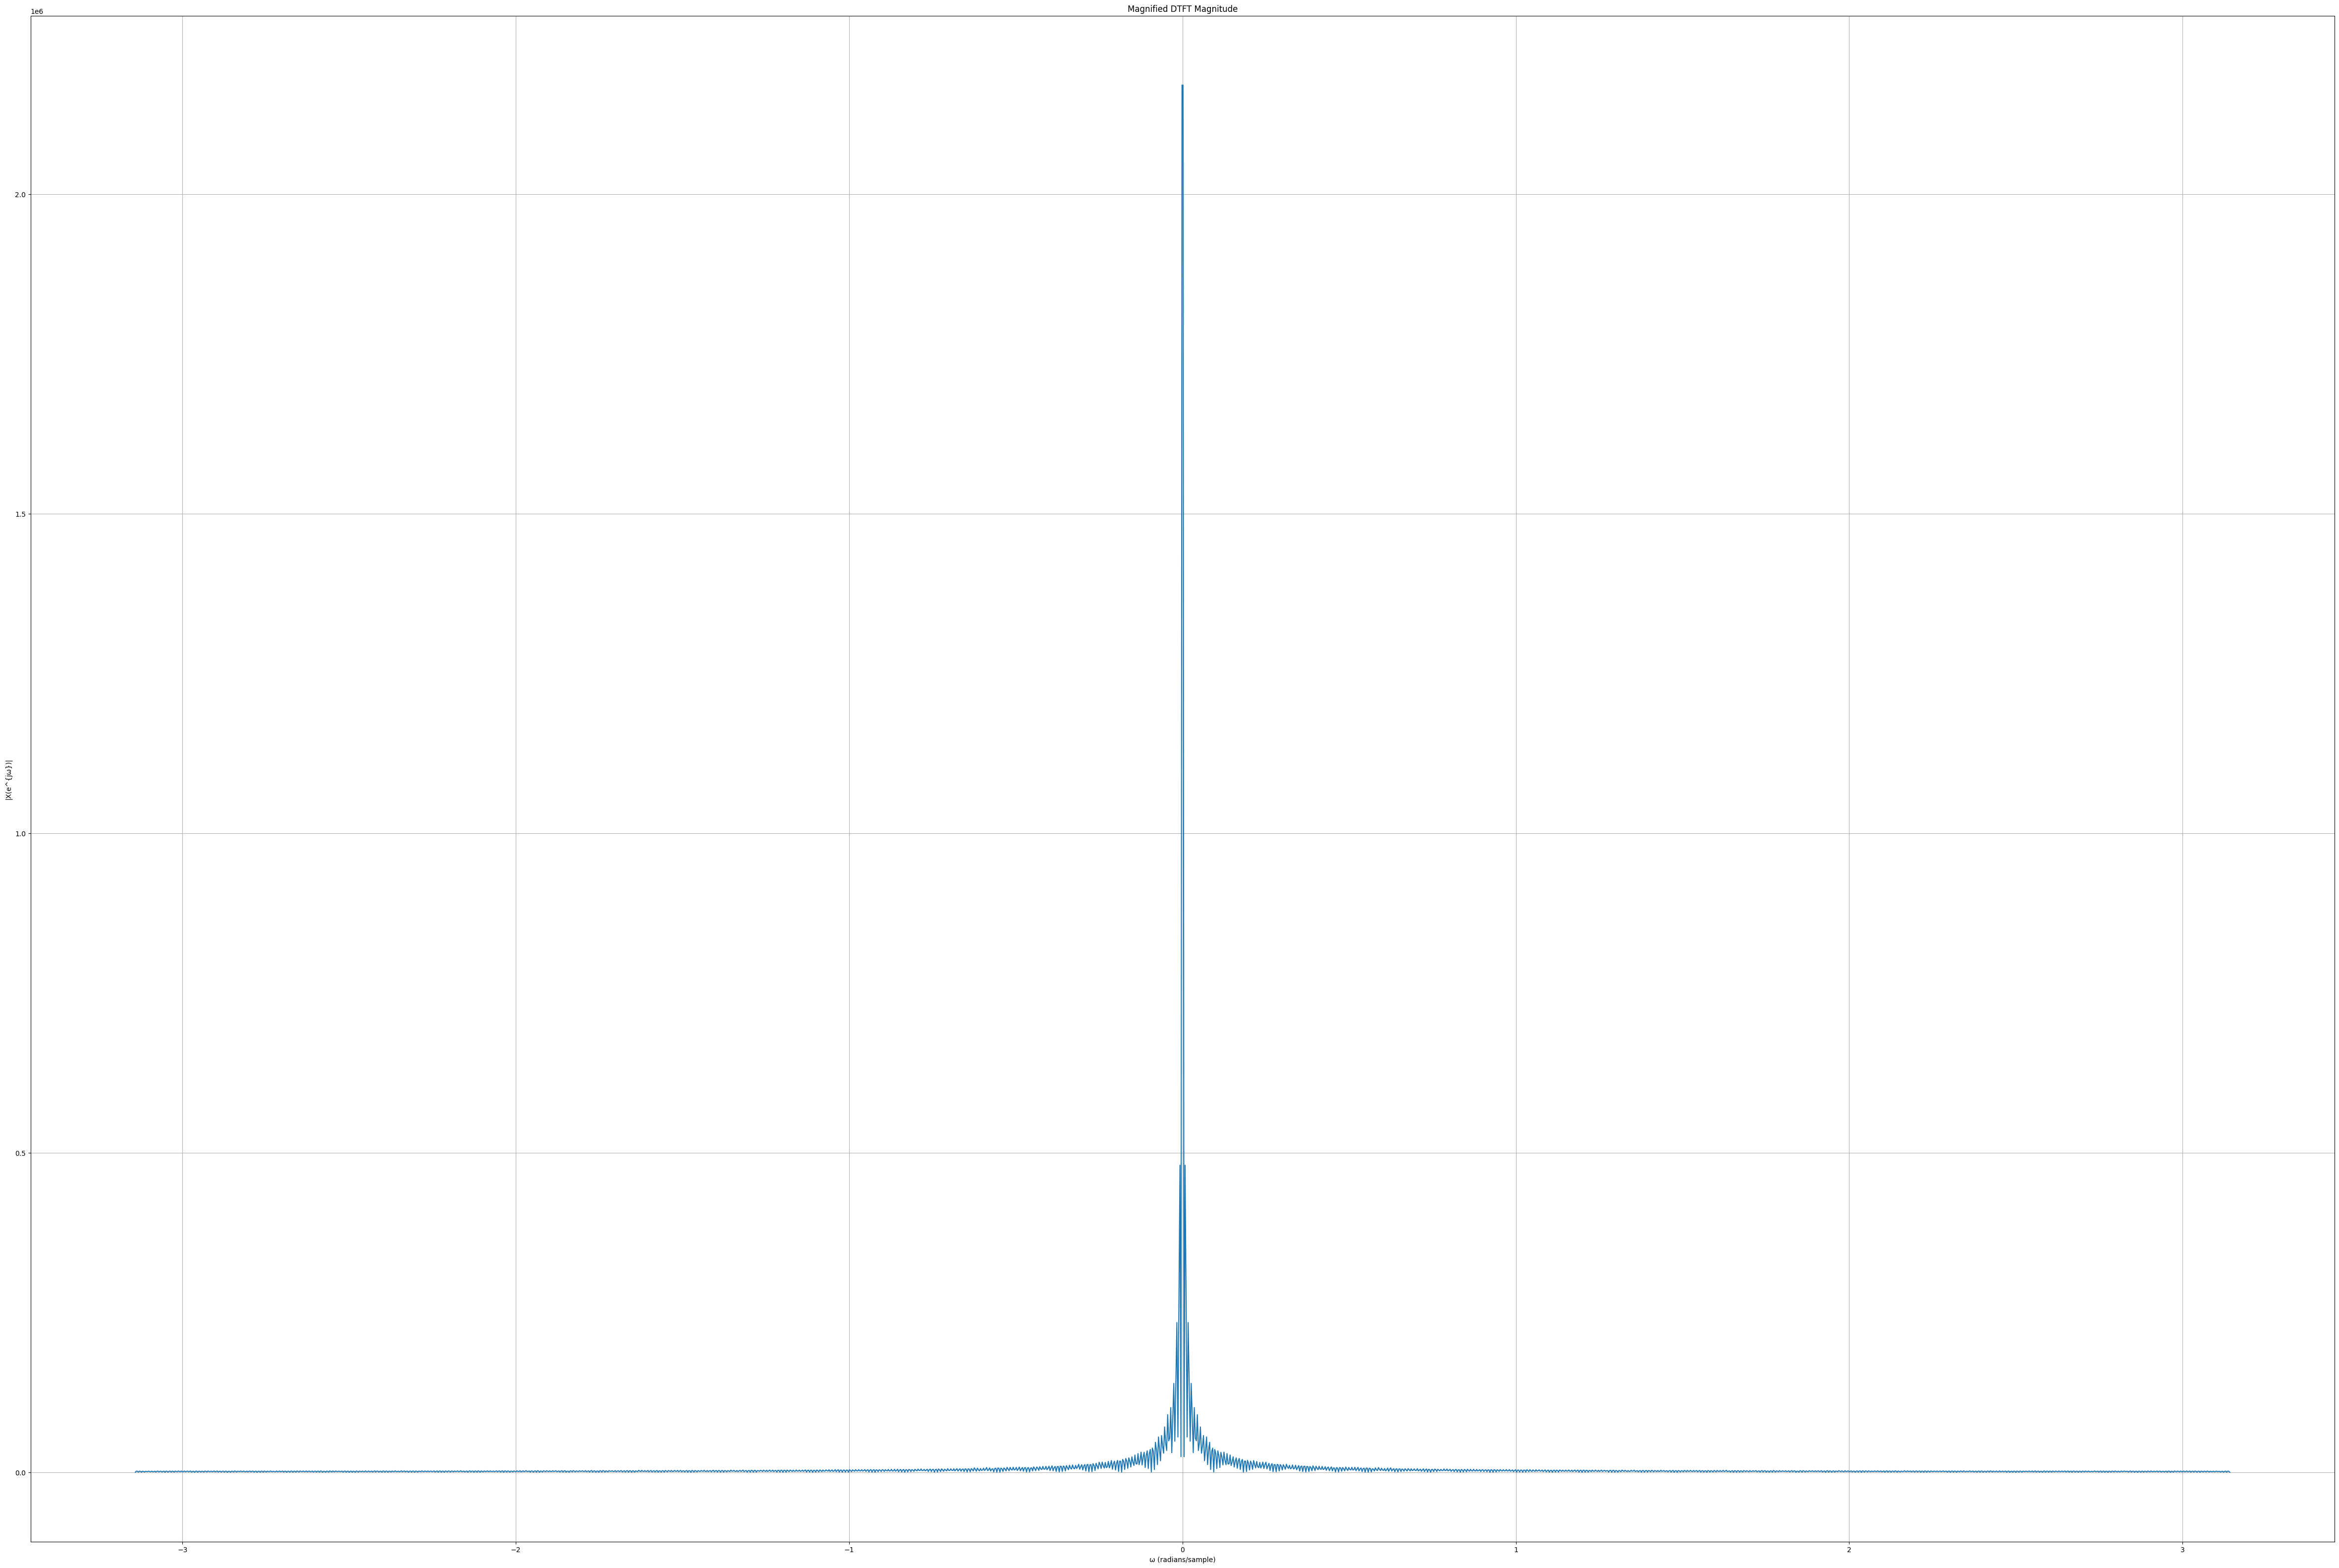

In [6]:
# plt.plot(omega, np.abs(X_dtft))
plt.figure(figsize=(60, 40))  # Adjust the figure size to magnify the image
plt.plot(omega, np.abs(X_dtft))
plt.title("Magnified DTFT Magnitude")
plt.xlabel("ω (radians/sample)")
plt.ylabel("|X(e^{jω})|")
plt.grid()
plt.show()

# Polynomial regression

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape the data for sklearn
X = squid_ink_x.reshape(-1, 1)  # Independent variable
y = squid_ink_y  # Dependent variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Predict values
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(squid_ink_x, squid_ink_y, color='blue', label='Actual Data', alpha=0.5)
plt.plot(squid_ink_x, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('Linear Regression on Squid Ink Mid Price')
plt.legend()
plt.show()